<p>&nbsp;</p>
<h1><span style="color: #0d3273;"><strong>Entanglement and&nbsp;circuits</strong></span></h1>
<p>&nbsp;</p>
<h3>Benjamin Vial</h3>
<h4><span style="color: #808080;">Queen Mary, University of London</span></h4>
<p><span style="color: #808080;">ECS7011P - Quantum Programming</span></p>
<p><span style="color: #808080;">19/02/2020</span></p>
<hr />
<img src="https://www.qmul.ac.uk/qm-resources/logos/QM144BlueOnLight.gif" alt="" style="align:right!important; width:20%;"/>

Operations are defined in this [Q# file (Operation.qs)](../edit/Operation.qs)

In [1]:
import qsharp
from qsharp import Result
import Quantum.Bell
from Quantum.Bell import DemoState
import importlib # reloading modules
importlib.reload(qsharp); # this is needed when the .qs file is changed

## One qubit gates and superposition

In [2]:
count = 200
initials = (Result.Zero, Result.One)
results = dict()
for i in initials:
  res = DemoState.simulate(count=count, initial=i)
  (num_zeros, num_ones) = res
  results[i]=res
  print(f'Init:{i: <4} 0s={num_zeros: <4} 1s={num_ones: <4}')

Init:0    0s=200  1s=0   
Init:1    0s=0    1s=200 


In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", context="talk")
flatui = ["#e74c3c", "#34495e", "#2ecc71","#9b59b6", "#3498db", "#95a5a6"]
palette = sns.color_palette(flatui)

In [4]:
def compute_probabilities(results, count):
    y0 = np.array(results[Result.Zero])/count
    y1 = np.array(results[Result.One])/count
    return y0, y1

def plot_probabilities(probas):
    y0, y1 = probas
    x = ["Zero","One"]
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5), sharex=True)
    sns.barplot(x=x, y=y0, palette=palette, ax=ax1)
    sns.barplot(x=x, y=y1, palette=palette, ax=ax2)
    ax1.axhline(0, color="k", clip_on=False)
    ax2.axhline(0, color="k", clip_on=False)
    ax1.set_ylabel("Probability")
    ax1.set_title("Init Zero")
    ax2.set_title("Init One")
    # Finalize the plot
    sns.despine(bottom=True)
    plt.tight_layout(h_pad=2)

In [5]:
probas = compute_probabilities(results, count)
print(f'Init:0 0s={probas[0][0]: <4} 1s={probas[0][1]: <4}')
print(f'Init:1 0s={probas[1][0]: <4} 1s={probas[1][1]: <4}')

Init:0 0s=1.0  1s=0.0 
Init:1 0s=0.0  1s=1.0 


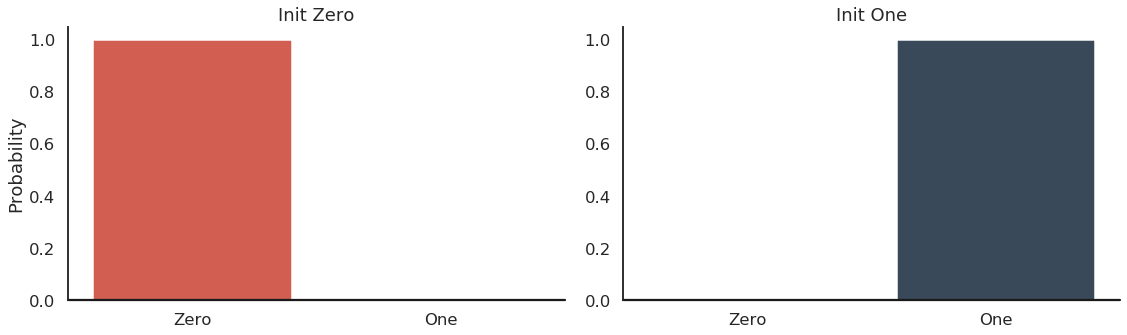

In [6]:
plot_probabilities(probas)

## Two qubit gates and Bell states

In [7]:
from Quantum.Bell import BellState
results_bell = dict()
for i in initials:
    res = BellState.simulate(count=count, initial=i)
    (num_zeros, num_ones, agree) = res
    results_bell[i]=res
    print(f'Init:{i: <4} 0s={num_zeros: <4} 1s={num_ones: <4} agree={agree: <4}')

Init:0    0s=97   1s=103  agree=200 
Init:1    0s=113  1s=87   agree=200 


In [8]:
def plot_probabilities(probas):
    y0, y1 = probas
    x = ["Zero","One", "Agree"]
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5), sharex=True)
    sns.barplot(x=x, y=y0, palette=palette, ax=ax1)
    sns.barplot(x=x, y=y1, palette=palette, ax=ax2)
    ax1.axhline(0, color="k", clip_on=False)
    ax2.axhline(0, color="k", clip_on=False)
    ax1.set_ylabel("Probability")
    ax1.set_title("Init Zero")
    ax2.set_title("Init One")
    # Finalize the plot
    sns.despine(bottom=True)
    plt.tight_layout(h_pad=2)

In [9]:
probas_bell = compute_probabilities(results_bell, count)
print(f'Init:0 0s={probas_bell[0][0]: <4} 1s={probas_bell[0][1]: <4} agree={probas_bell[0][2]: <4}')
print(f'Init:1 0s={probas_bell[1][0]: <4} 1s={probas_bell[1][1]: <4} agree={probas_bell[1][2]: <4}')

Init:0 0s=0.485 1s=0.515 agree=1.0 
Init:1 0s=0.565 1s=0.435 agree=1.0 


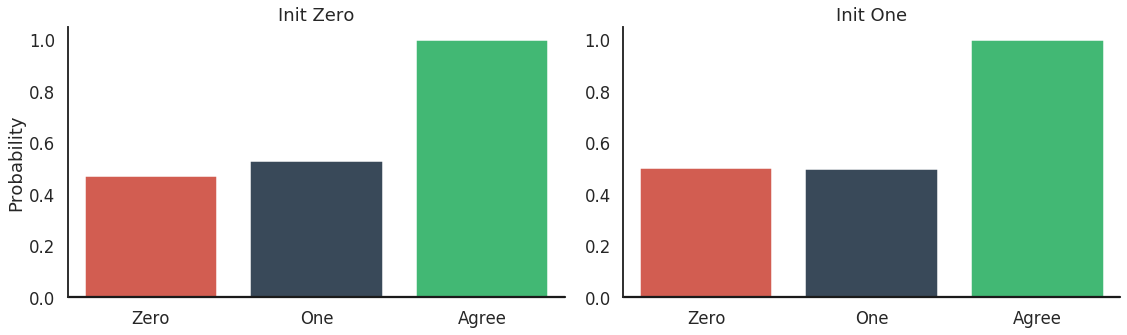

In [22]:
plot_probabilities(probas_bell)